## V5589 Sgr Spectral Index

In [88]:
#imports
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sympy import diff as dif

from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling.powerlaws import BrokenPowerLaw1D, SmoothlyBrokenPowerLaw1D, PowerLaw1D
from astropy.modeling import fitting, models

### Importing the data and putting it in a large dataframe

In [89]:
data = ([56040.4,	1,	33,	0.032,	0.025,	1.00E-10,	0.05],
    [56069.0,	'A',	225.3,	13.80,	2.000,	1.00E-10,	0.05],
    [56084.4,	2,	5,	1.089,	0.028,	1.00E-10,	0.05],
    [56084.4,	2,	6.8,	1.381,	0.025,	1.00E-10,	0.05],
    [56092.2,	3,	13.3,	3.523,	0.042,	1.00E-10,	0.05],
    [56092.2,	3,	16,	3.98,	0.049,	1.00E-10,	0.05],
    [56092.2,	3,	28.2,	5.727,	0.098,	1.00E-10,	0.05],
    [56092.2,	3,	36.5,	5.961,	0.139,	1.00E-10,	0.05],
    [56100.3,	4,	2.5,	3.094,	0.037,	1.00E-10,	0.05],
    [56100.3,	4,	3.5,	3.201,	0.030,	1.00E-10,	0.05],
    [56100.3,	4,	5,	3.423,	0.023,	1.00E-10,	0.05],
    [56100.3,	4,	6.8,	3.629,	0.025,	1.00E-10,	0.05],
    [56100.3,	4,	8.5,	3.683,	0.052,	1.00E-10,	0.05],
    [56100.3,	4,	11.4,	3.779,	0.071,	1.00E-10,	0.05],
    [56117.9,	'B',	225.5,	0.000,	0.068,	1.00E-10,	0.05],
    [56119.1,	5,	1.35,	1.68,	0.120,	1.00E-10,	0.05],
    [56119.1,	5,	1.84,	1.391,	0.066,	1.00E-10,	0.05],
    [56119.1,	5,	4.74,	1.907,	0.027,	1.00E-10,	0.05],
    [56119.1,	5,	7.59,	1.921,	0.023,	1.00E-10,	0.05],
    [56128.3,	6,	17.5,	1.374,	0.091,	1.00E-10,	0.05],
    [56128.3,	6,	27.5,	1.438,	0.143,	1.00E-10,	0.05],
    [56128.3,	6,	36.5,	1.136,	0.194,	1.00E-10,	0.05],
    [56148.0,	7,	1.2555,	0.340,	0.071,	1.00E-10,	0.05],
    [56148.0,	7,	1.7715,	0.560,	0.072,	1.00E-10,	0.05],
    [56148.0,	7,	4.74,	0.521,	0.033,	1.00E-10,	0.05],
    [56148.0,	7,	7.59,	0.528,	0.025,	1.00E-10,	0.05],
    [56148.0,	7,	8.53,	0.556,	0.031,	1.00E-10,	0.05],
    [56148.0,	7,	11.38,	0.571,	0.060,	1.00E-10,	0.05],
    [56150.2,	8,	13.3,	0.495,	0.042,	1.00E-10,	0.05],
    [56150.2,	8,	17.45,	0.38,	0.049,	1.00E-10,	0.05],
    [56150.2,	8,	27.5,	0.469,	0.078,	1.00E-10,	0.05],
    [56150.2,	8,	36.5,	0.39,	0.086,	1.00E-10,	0.05],
    [56151.3,	8,	1.25,	0,	0.091,	1.00E-10,	0.05],
    [56151.3,	8,	1.80,	0.497,	0.088,	1.00E-10,	0.05],
    [56151.3,	8,	4.549,	0.502,	0.034,	1.00E-10,	0.05],
    [56151.3,	8,	7.399,	0.469,	0.025,	1.00E-10,	0.05],
    [56151.3,	8,	8.51,	0.443,	0.021,	1.00E-10,	0.05],
    [56151.3,	8,	11.34,	0.418,	0.035,	1.00E-10,	0.05],
    
#S4322
    [56167.0,	9,	1.36,	0.244,	0.049,	1.00E-10,	0.05],
    [56167.0,	9,	1.78,	0.431,	0.048,	1.00E-10,	0.05],

#12A-479
#56167.0	9	1.3835	0	0.075	1.00E-10	0.05
#56167.0	9	1.8035	0	0.029	1.00E-10	0.05
    [56167.0,	9,	4.608,	0.347,	0.028,	1.00E-10,	0.05],
    [56167.0,	9,	7.458,	0.292,	0.016,	1.00E-10,	0.05],
    [56167.0,	9,	8.5,	0.289,	0.018,	1.00E-10,	0.05],
    [56167.0,	9,	11.4,	0.368,	0.031,	1.00E-10,	0.05],

#12A-483
#56167.0	9	1.2555	0	0.086	1.00E-10	0.05
#56167.0	9	1.7395	0.346	0.093	1.00E-10	0.05
#56167.0	9	4.5490	0.282	0.036	1.00E-10	0.05
#56167.0	9	7.399	0.286	0.024	1.00E-10	0.05

    [56174.2,	10,	13.3,	0.188,	0.019,	1.00E-10,	0.05],
    [56174.2,	10,	17.45,	0.110,	0.029,	1.00E-10,	0.05],
    [56174.2,	10,	27.5,	0.106,	0.027,	1.00E-10,	0.05],
    [56174.2,	10,	36.5,	0.365,	0.131,	1.00E-10,	0.05],
    [56177.9,	11,	1.33,	0.225,	0.044,	1.00E-10,	0.05],
    [56177.9,	11,	1.77,	0.201,	0.042,	1.00E-10,	0.05],
    [56231.0,	12,	13.3,	0.035,	0.021,	1.00E-10,	0.05],
    [56231.0,	12,	17.4,	0.043,	0.027,	1.00E-10,	0.05],
    [56231.0,	12,	27.5,	0.060,	0.044,	1.00E-10,	0.05],
    [56231.0,	12,	36.5,	0.044,	0.052,	1.00E-10,	0.05],
    [56270.8,	13,	1.2555,	0,	0.083,	1.00E-10,	0.05],
    [56270.8,	13,	1.7395,	0,	0.084,	1.00E-10,	0.05],
    [56270.8,	13,	4.549,	0,	0.021,	1.00E-10,	0.05],
    [56270.8,	13,	7.399,	0,	0.016,	1.00E-10,	0.05],
    [56270.8,	13,	8.519,	0,	0.025,	1.00E-10,	0.05],
    [56270.8,	13,	11.399,	0,	0.030,	1.00E-10,	0.05],
    [56284.6,	14,	13.299,	0,	0.029,	1.00E-10,	0.05],
    [56284.6,	14,	17.449,	0,	0.035,	1.00E-10,	0.05],
    [56284.6,	14,	13.30,	0.047,	0.022,	1.00E-10,	0.05],
    [56284.6,	14,	17.45,	0.049,	0.026,	1.00E-10,	0.05],
    [56284.6,	14,	27.50,	0.036,	0.050,	1.00E-10,	0.05],
    [56284.6,	14,	36.50,	0.020,	0.068,	1.00E-10,	0.05],
    [56297.7,	15,	1.26,	0.0504,	0.102,	1.00E-10,	0.05],
    [56297.7,	15,	1.74,	-0.00249,	0.068,	1.00E-10,	0.05],
    [56297.7,	15,	4.55,	0.0328,	0.033,	1.00E-10,	0.05],
    [56297.7,	15,	7.399,	0.0288,	0.023,	1.00E-10,	0.05],
    [56297.7,	15,	8.52,	0.0286,	0.018,	1.00E-10,	0.05],
    [56297.7,	15,	11.4,	0.0413,	0.023,	1.00E-10,	0.05],
    [56347.7,	16,	1.26,	0.346,	0.503,	1.00E-10,	0.05],
    [56347.7,	16,	1.74,	-0.0272,	0.368,	1.00E-10,	0.05],
    [56347.7,	16,	4.55,	-0.232,	0.114,	1.00E-10,	0.05],
    [56347.7,	16,	7.399,	-0.00948,	0.160,	1.00E-10,	0.05],
    [56347.7,	16,	8.52,	0.465,	0.201,	1.00E-10,	0.05],
    [56347.7,	16,	11.4,	-0.0358,	0.301,	1.00E-10,	0.05],
    [56358.6,	17,	13.22,	0.025,	0.027,	1.00E-10,	0.05],
    [56358.6,	17,	17.45,	0.009,	0.025,	1.00E-10,	0.05],
    [56358.6,	17,	27.50,	0.046,	0.049,	1.00E-10,	0.05],
    [56358.6,	17,	36.50,	0.120,	0.062,	1.00E-10,	0.05],
    [56369.6,	17,	13.3,	-0.0319,	0.023,	1.00E-10,	0.05],
    [56369.6,	17,	17.4,	0.0240,	0.029,	1.00E-10,	0.05],
    [56369.6,	17,	27.5,	0.113,	0.065,	1.00E-10,	0.05],
    [56369.6,	17,	36.5,	0.0109,	0.083,	1.00E-10,	0.05],
    [56441.4,	18,	1.26,	0.0811,	0.396,	1.00E-10,	0.05],
    [56441.4,	18,	1.74,	-0.202,	0.326,	1.00E-10,	0.05],
    [56441.4,	18,	4.55,	0.0437,	0.033,	1.00E-10,	0.05],
    [56441.4,	18,	7.399,	-0.0098,	0.021,	1.00E-10,	0.05],
    [56441.4,	18,	8.52,	-0.00263,	0.018,	1.00E-10,	0.05],
    [56441.4,	18,	11.4,	-0.0266,	0.019,	1.00E-10,	0.05],
    [56446.2,	18,	13.3,	-0.0169,	0.024,	1.00E-10,	0.05],
    [56446.2,	18,	17.4,	0.0260,	0.029,	1.00E-10,	0.05],
    [56446.2,	18,	27.5,	0.112,	0.077,	1.00E-10,	0.05],
    [56446.2,	18,	36.5,	-0.0663,	0.095,	1.00E-10,	0.05],
    [56526.7,	19,	1.26,	-0.571,	0.276,	1.00E-10,	0.05],
    [56526.7,	19,	1.74,	-0.348,	0.169,	1.00E-10,	0.05],
    [56526.7,	19,	4.55,	-0.00306,	0.028,	1.00E-10,	0.05],
    [56526.7,	19,	7.40,	-0.0045,	0.019,	1.00E-10,	0.05],
    [56526.7,	19,	8.52,	0.00449,	0.022,	1.00E-10,	0.05],
    [56526.7,	19,	11.4,	-0.0051,	0.024,	1.00E-10,	0.05],
    [56530.7,	19,	13.3,	-0.00734,	0.031,	1.00E-10,	0.05],
    [56530.7,	19,	17.4,	-0.00912,	0.053,	1.00E-10,	0.05],
    [56530.7,	19,	27.5,	0.0271,	0.011,	1.00E-10,	0.05],
    [56530.7,	19,	36.5,	0.110,	0.110,	1.00E-10,	0.05],
       )

df =  pd.DataFrame(data, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

### now to seperate it into dataframe based on days

In [90]:
E1=(    [56040.4,	1,	33,	0.032,	0.025,	1.00E-10,	0.05],)

E2=(    [56069.0,	'A',	225.3,	13.80,	2.000,	1.00E-10,	0.05],)

E3=(    [56084.4,	2,	5,	1.089,	0.028,	1.00E-10,	0.05],
    [56084.4,	2,	6.8,	1.381,	0.025,	1.00E-10,	0.05],)

E4=(    [56092.2,	3,	13.3,	3.523,	0.042,	1.00E-10,	0.05],
    [56092.2,	3,	16,	3.98,	0.049,	1.00E-10,	0.05],
    [56092.2,	3,	28.2,	5.727,	0.098,	1.00E-10,	0.05],
    [56092.2,	3,	36.5,	5.961,	0.139,	1.00E-10,	0.05],)

E5=(
    [56100.3,	4,	2.5,	3.094,	0.037,	1.00E-10,	0.05],
    [56100.3,	4,	3.5,	3.201,	0.030,	1.00E-10,	0.05],
    [56100.3,	4,	5,	3.423,	0.023,	1.00E-10,	0.05],
    [56100.3,	4,	6.8,	3.629,	0.025,	1.00E-10,	0.05],
    [56100.3,	4,	8.5,	3.683,	0.052,	1.00E-10,	0.05],
    [56100.3,	4,	11.4,	3.779,	0.071,	1.00E-10,	0.05],)

E6 =(
    [56117.9,	'B',	225.5,	0.000,	0.068,	1.00E-10,	0.05],)

E7 =(
    [56119.1,	5,	1.35,	1.68,	0.120,	1.00E-10,	0.05],
    [56119.1,	5,	1.84,	1.391,	0.066,	1.00E-10,	0.05],
    [56119.1,	5,	4.74,	1.907,	0.027,	1.00E-10,	0.05],
    [56119.1,	5,	7.59,	1.921,	0.023,	1.00E-10,	0.05],)

E8 =(
    [56128.3,	6,	17.5,	1.374,	0.091,	1.00E-10,	0.05],
    [56128.3,	6,	27.5,	1.438,	0.143,	1.00E-10,	0.05],
    [56128.3,	6,	36.5,	1.136,	0.194,	1.00E-10,	0.05],)

E9 = (
    [56148.0,	7,	1.2555,	0.340,	0.071,	1.00E-10,	0.05],
    [56148.0,	7,	1.7715,	0.560,	0.072,	1.00E-10,	0.05],
    [56148.0,	7,	4.74,	0.521,	0.033,	1.00E-10,	0.05],
    [56148.0,	7,	7.59,	0.528,	0.025,	1.00E-10,	0.05],
    [56148.0,	7,	8.53,	0.556,	0.031,	1.00E-10,	0.05],
    [56148.0,	7,	11.38,	0.571,	0.060,	1.00E-10,	0.05],)

E10=(
    [56150.2,	8,	13.3,	0.495,	0.042,	1.00E-10,	0.05],
    [56150.2,	8,	17.45,	0.38,	0.049,	1.00E-10,	0.05],
    [56150.2,	8,	27.5,	0.469,	0.078,	1.00E-10,	0.05],
    [56150.2,	8,	36.5,	0.39,	0.086,	1.00E-10,	0.05],
    [56151.3,	8,	1.25,	0,	0.091,	1.00E-10,	0.05],
    [56151.3,	8,	1.80,	0.497,	0.088,	1.00E-10,	0.05],
    [56151.3,	8,	4.549,	0.502,	0.034,	1.00E-10,	0.05],
    [56151.3,	8,	7.399,	0.469,	0.025,	1.00E-10,	0.05],
    [56151.3,	8,	8.51,	0.443,	0.021,	1.00E-10,	0.05],
    [56151.3,	8,	11.34,	0.418,	0.035,	1.00E-10,	0.05],)

E11 = (
#S4322
    [56167.0,	9,	1.36,	0.244,	0.049,	1.00E-10,	0.05],
    [56167.0,	9,	1.78,	0.431,	0.048,	1.00E-10,	0.05],
#12A-479
#56167.0	9	1.3835	0	0.075	1.00E-10	0.05
#56167.0	9	1.8035	0	0.029	1.00E-10	0.05
    [56167.0,	9,	4.608,	0.347,	0.028,	1.00E-10,	0.05],
    [56167.0,	9,	7.458,	0.292,	0.016,	1.00E-10,	0.05],
    [56167.0,	9,	8.5,	0.289,	0.018,	1.00E-10,	0.05],
    [56167.0,	9,	11.4,	0.368,	0.031,	1.00E-10,	0.05],
#12A-483
#56167.0	9	1.2555	0	0.086	1.00E-10	0.05
#56167.0	9	1.7395	0.346	0.093	1.00E-10	0.05
#56167.0	9	4.5490	0.282	0.036	1.00E-10	0.05
#56167.0	9	7.399	0.286	0.024	1.00E-10	0.05
)

E12 = (
    [56174.2,	10,	13.3,	0.188,	0.019,	1.00E-10,	0.05],
    [56174.2,	10,	17.45,	0.110,	0.029,	1.00E-10,	0.05],
    [56174.2,	10,	27.5,	0.106,	0.027,	1.00E-10,	0.05],
    [56174.2,	10,	36.5,	0.365,	0.131,	1.00E-10,	0.05],)

E13= (
    [56177.9,	11,	1.33,	0.225,	0.044,	1.00E-10,	0.05],
    [56177.9,	11,	1.77,	0.201,	0.042,	1.00E-10,	0.05],)

E14 = (
    [56231.0,	12,	13.3,	0.035,	0.021,	1.00E-10,	0.05],
    [56231.0,	12,	17.4,	0.043,	0.027,	1.00E-10,	0.05],
    [56231.0,	12,	27.5,	0.060,	0.044,	1.00E-10,	0.05],
    [56231.0,	12,	36.5,	0.044,	0.052,	1.00E-10,	0.05],)

E15 = (
    [56270.8,	13,	1.2555,	0,	0.083,	1.00E-10,	0.05],
    [56270.8,	13,	1.7395,	0,	0.084,	1.00E-10,	0.05],
    [56270.8,	13,	4.549,	0,	0.021,	1.00E-10,	0.05],
    [56270.8,	13,	7.399,	0,	0.016,	1.00E-10,	0.05],
    [56270.8,	13,	8.519,	0,	0.025,	1.00E-10,	0.05],
    [56270.8,	13,	11.399,	0,	0.030,	1.00E-10,	0.05],)

E16 = (
    [56284.6,	14,	13.299,	0,	0.029,	1.00E-10,	0.05],
    [56284.6,	14,	17.449,	0,	0.035,	1.00E-10,	0.05],
    [56284.6,	14,	13.30,	0.047,	0.022,	1.00E-10,	0.05],
    [56284.6,	14,	17.45,	0.049,	0.026,	1.00E-10,	0.05],
    [56284.6,	14,	27.50,	0.036,	0.050,	1.00E-10,	0.05],
    [56284.6,	14,	36.50,	0.020,	0.068,	1.00E-10,	0.05],)

E17 = (
    [56297.7,	15,	1.26,	0.0504,	0.102,	1.00E-10,	0.05],
    [56297.7,	15,	1.74,	-0.00249,	0.068,	1.00E-10,	0.05],
    [56297.7,	15,	4.55,	0.0328,	0.033,	1.00E-10,	0.05],
    [56297.7,	15,	7.399,	0.0288,	0.023,	1.00E-10,	0.05],
    [56297.7,	15,	8.52,	0.0286,	0.018,	1.00E-10,	0.05],
    [56297.7,	15,	11.4,	0.0413,	0.023,	1.00E-10,	0.05],)

E18 = (
    [56347.7,	16,	1.26,	0.346,	0.503,	1.00E-10,	0.05],
    [56347.7,	16,	1.74,	-0.0272,	0.368,	1.00E-10,	0.05],
    [56347.7,	16,	4.55,	-0.232,	0.114,	1.00E-10,	0.05],
    [56347.7,	16,	7.399,	-0.00948,	0.160,	1.00E-10,	0.05],
    [56347.7,	16,	8.52,	0.465,	0.201,	1.00E-10,	0.05],
    [56347.7,	16,	11.4,	-0.0358,	0.301,	1.00E-10,	0.05],)

E19 = (
    [56358.6,	17,	13.22,	0.025,	0.027,	1.00E-10,	0.05],
    [56358.6,	17,	17.45,	0.009,	0.025,	1.00E-10,	0.05],
    [56358.6,	17,	27.50,	0.046,	0.049,	1.00E-10,	0.05],
    [56358.6,	17,	36.50,	0.120,	0.062,	1.00E-10,	0.05],)

E20 = (
    [56369.6,	17,	13.3,	-0.0319,	0.023,	1.00E-10,	0.05],
    [56369.6,	17,	17.4,	0.0240,	0.029,	1.00E-10,	0.05],
    [56369.6,	17,	27.5,	0.113,	0.065,	1.00E-10,	0.05],
    [56369.6,	17,	36.5,	0.0109,	0.083,	1.00E-10,	0.05],)

E21 = (
    [56441.4,	18,	1.26,	0.0811,	0.396,	1.00E-10,	0.05],
    [56441.4,	18,	1.74,	-0.202,	0.326,	1.00E-10,	0.05],
    [56441.4,	18,	4.55,	0.0437,	0.033,	1.00E-10,	0.05],
    [56441.4,	18,	7.399,	-0.0098,	0.021,	1.00E-10,	0.05],
    [56441.4,	18,	8.52,	-0.00263,	0.018,	1.00E-10,	0.05],
    [56441.4,	18,	11.4,	-0.0266,	0.019,	1.00E-10,	0.05],)

E22 = (
    [56446.2,	18,	13.3,	-0.0169,	0.024,	1.00E-10,	0.05],
    [56446.2,	18,	17.4,	0.0260,	0.029,	1.00E-10,	0.05],
    [56446.2,	18,	27.5,	0.112,	0.077,	1.00E-10,	0.05],
    [56446.2,	18,	36.5,	-0.0663,	0.095,	1.00E-10,	0.05],)

E23 = (
    [56526.7,	19,	1.26,	-0.571,	0.276,	1.00E-10,	0.05],
    [56526.7,	19,	1.74,	-0.348,	0.169,	1.00E-10,	0.05],
    [56526.7,	19,	4.55,	-0.00306,	0.028,	1.00E-10,	0.05],
    [56526.7,	19,	7.40,	-0.0045,	0.019,	1.00E-10,	0.05],
    [56526.7,	19,	8.52,	0.00449,	0.022,	1.00E-10,	0.05],
    [56526.7,	19,	11.4,	-0.0051,	0.024,	1.00E-10,	0.05],)

E24 = (
    [56530.7,	19,	13.3,	-0.00734,	0.031,	1.00E-10,	0.05],
    [56530.7,	19,	17.4,	-0.00912,	0.053,	1.00E-10,	0.05],
    [56530.7,	19,	27.5,	0.0271,	0.011,	1.00E-10,	0.05],
    [56530.7,	19,	36.5,	0.110,	0.110,	1.00E-10,	0.05],)

### Creating the dataframes

In [91]:
df1 =  pd.DataFrame(E1, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df2 =  pd.DataFrame(E2, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df3 =  pd.DataFrame(E3, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df4 =  pd.DataFrame(E4, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df5 =  pd.DataFrame(E5, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df6 =  pd.DataFrame(E6, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df7 =  pd.DataFrame(E7, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df8 =  pd.DataFrame(E8, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df9 =  pd.DataFrame(E9, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df10 =  pd.DataFrame(E10, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df11 =  pd.DataFrame(E11, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df12 =  pd.DataFrame(E12, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df13 =  pd.DataFrame(E13, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df14 =  pd.DataFrame(E14, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df15 =  pd.DataFrame(E15, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df16 =  pd.DataFrame(E16, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df17 =  pd.DataFrame(E17, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df18 =  pd.DataFrame(E18, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df19 =  pd.DataFrame(E19, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df20 =  pd.DataFrame(E20, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df21 =  pd.DataFrame(E21, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df22 =  pd.DataFrame(E22, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df23 =  pd.DataFrame(E23, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df24 =  pd.DataFrame(E24, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])


### making a loop to plot the spectral index

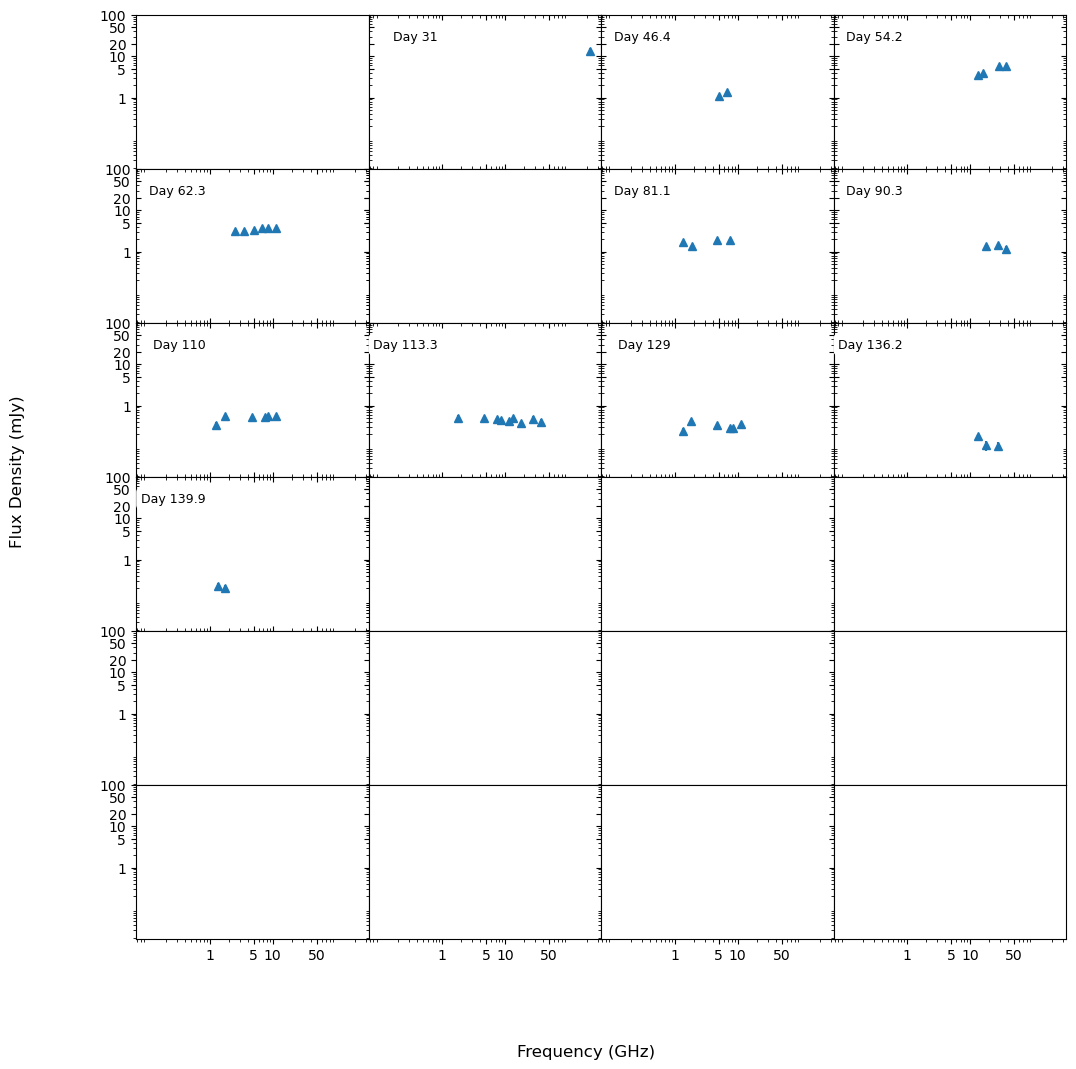

In [92]:

#putting them all in a list
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10,
       df11, df12, df13, df14, df15, df16, df17, df18, df19, df20,
       df21, df22, df23, df24]


#the days by the list so they can all be defined
annotations = ['Day 2.4', 'Day 31', 'Day 46.4', 'Day 54.2', 'Day 62.3', 'Day 79.9',
               'Day 81.1', 'Day 90.3', 'Day 110', 'Day 113.3', 'Day 129', 'Day 136.2',
               'Day 139.9', 'Day 193', 'Day 232.8', 'Day 246.6', 'Day 259.7',
               'Day 309.7', 'Day 320.6', 'Day 331.6', 'Day 403.4', 'Day 408.2',
               'Day 488.7', 'Day 492.7']

#making the figure (6,4) is the (rows, columns)
fig, ax = plt.subplots(6, 4, sharex='all', sharey='all')
fig.set_size_inches(12, 12)
fig.subplots_adjust(hspace=0, wspace=0)

#loop for each of the datasets
for idx, (df, label) in enumerate(zip(dfs, annotations)):
    row, col = divmod(idx, 4)
    mask = df['Flux'] > 3 * df['error'] #don't show the non-detections
    if mask.any():
        ax[row, col].errorbar(df['Freq'][mask], df['Flux'][mask], yerr=df['error'][mask], fmt='^')
        ax[row, col].set_xscale('log')
        ax[row, col].set_yscale('log')
        ax[row, col].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
        ax[row, col].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
        ax[row, col].annotate(label, xy=(50, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
        ax[row, col].tick_params(axis='both', which='both', direction='in', top=True, right=True)

fig.supxlabel("Frequency (GHz)")
fig.supylabel("Flux Density (mJy)")
plt.show();

### Now cleaning it up so it's not using all of those empty plots (the empty plots are due to non-detections)

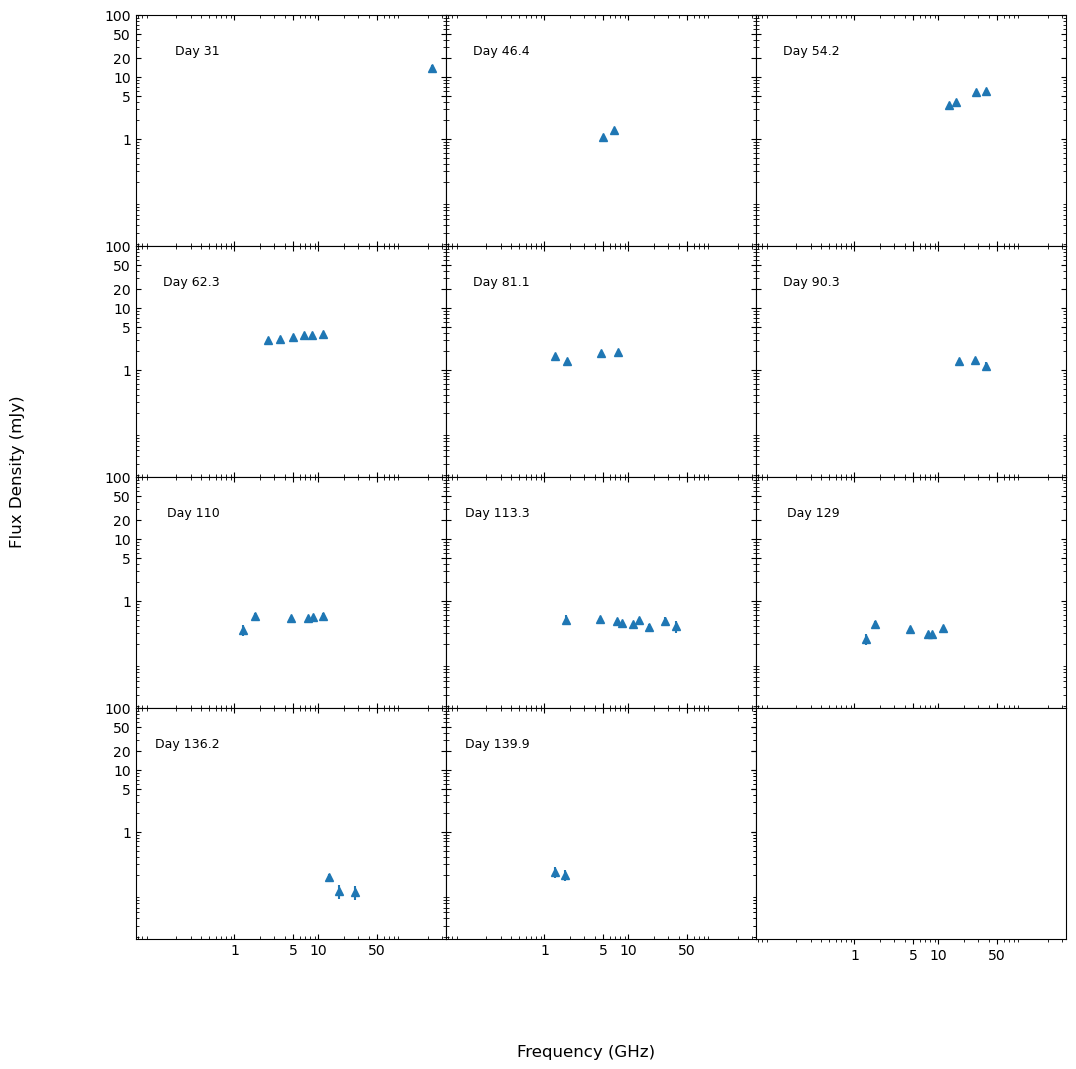

In [93]:
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10,
       df11, df12, df13, df14, df15, df16, df17, df18, df19, df20,
       df21, df22, df23, df24]


#the days by the list so they can all be defined
annotations = ['Day 2.4', 'Day 31', 'Day 46.4', 'Day 54.2', 'Day 62.3', 'Day 79.9',
               'Day 81.1', 'Day 90.3', 'Day 110', 'Day 113.3', 'Day 129', 'Day 136.2',
               'Day 139.9', 'Day 193', 'Day 232.8', 'Day 246.6', 'Day 259.7',
               'Day 309.7', 'Day 320.6', 'Day 331.6', 'Day 403.4', 'Day 408.2',
               'Day 488.7', 'Day 492.7']

#making the figure (6,4) is the (rows, columns)
fig, ax = plt.subplots(4, 3, sharex='all', sharey='all')
fig.set_size_inches(12, 12)
fig.subplots_adjust(hspace=0, wspace=0)

mask = df2['Flux'] > 3 * df2['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0, 0].errorbar(df2['Freq'][mask], df2['Flux'][mask], yerr=df2['error'][mask], fmt='^')
    ax[0, 0].set_xscale('log')
    ax[0, 0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[0, 0].set_yscale('log')
    ax[0, 0].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
    ax[0, 0].annotate('Day 31', xy=(60, 145), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0, 0].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df3['Flux'] > 3 * df3['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0, 1].errorbar(df3['Freq'][mask], df3['Flux'][mask], yerr=df3['error'][mask], fmt='^')
    ax[0, 1].set_xscale('log')
    ax[0, 1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[0, 1].set_yscale('log')
    ax[0, 1].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
    ax[0, 1].annotate('Day 46.4', xy=(60, 145), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0, 1].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df4['Flux'] > 3 * df4['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0, 2].errorbar(df4['Freq'][mask], df4['Flux'][mask], yerr=df4['error'][mask], fmt='^')
    ax[0, 2].set_xscale('log')
    ax[0, 2].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[0, 2].set_yscale('log')
    ax[0, 2].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
    ax[0, 2].annotate('Day 54.2', xy=(60, 145), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0, 2].tick_params(axis='both', which='both', direction='in', top=True, right=True)



mask = df5['Flux'] > 3 * df5['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1, 0].errorbar(df5['Freq'][mask], df5['Flux'][mask], yerr=df5['error'][mask], fmt='^')
    ax[1, 0].set_xscale('log')
    ax[1, 0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[1, 0].set_yscale('log')
    ax[1, 0].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
    ax[1, 0].annotate('Day 62.3', xy=(60, 145), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1, 0].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df7['Flux'] > 3 * df7['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1, 1].errorbar(df7['Freq'][mask], df7['Flux'][mask], yerr=df7['error'][mask], fmt='^')
    ax[1, 1].set_xscale('log')
    ax[1, 1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[1, 1].set_yscale('log')
    ax[1, 1].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
    ax[1, 1].annotate('Day 81.1', xy=(60, 145), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1, 1].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df8['Flux'] > 3 * df8['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1, 2].errorbar(df8['Freq'][mask], df8['Flux'][mask], yerr=df8['error'][mask], fmt='^')
    ax[1, 2].set_xscale('log')
    ax[1, 2].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[1, 2].set_yscale('log')
    ax[1, 2].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
    ax[1, 2].annotate('Day 90.3', xy=(60, 145), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1, 2].tick_params(axis='both', which='both', direction='in', top=True, right=True)




mask = df9['Flux'] > 3 * df9['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2, 0].errorbar(df9['Freq'][mask], df9['Flux'][mask], yerr=df9['error'][mask], fmt='^')
    ax[2, 0].set_xscale('log')
    ax[2, 0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[2, 0].set_yscale('log')
    ax[2, 0].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
    ax[2, 0].annotate('Day 110', xy=(60, 145), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2, 0].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df10['Flux'] > 3 * df10['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2, 1].errorbar(df10['Freq'][mask], df10['Flux'][mask], yerr=df10['error'][mask], fmt='^')
    ax[2, 1].set_xscale('log')
    ax[2, 1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[2, 1].set_yscale('log')
    ax[2, 1].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
    ax[2, 1].annotate('Day 113.3', xy=(60, 145), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2, 1].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df11['Flux'] > 3 * df11['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2, 2].errorbar(df11['Freq'][mask], df11['Flux'][mask], yerr=df11['error'][mask], fmt='^')
    ax[2, 2].set_xscale('log')
    ax[2, 2].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[2, 2].set_yscale('log')
    ax[2, 2].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
    ax[2, 2].annotate('Day 129', xy=(60, 145), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2, 2].tick_params(axis='both', which='both', direction='in', top=True, right=True)



mask = df12['Flux'] > 3 * df12['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[3, 0].errorbar(df12['Freq'][mask], df12['Flux'][mask], yerr=df12['error'][mask], fmt='^')
    ax[3, 0].set_xscale('log')
    ax[3, 0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[3, 0].set_yscale('log')
    ax[3, 0].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
    ax[3, 0].annotate('Day 136.2', xy=(60, 145), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3, 0].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df13['Flux'] > 3 * df13['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[3, 1].errorbar(df13['Freq'][mask], df13['Flux'][mask], yerr=df13['error'][mask], fmt='^')
    ax[3, 1].set_xscale('log')
    ax[3, 1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[3, 1].set_yscale('log')
    ax[3, 1].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
    ax[3, 1].annotate('Day 139.9', xy=(60, 145), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3, 1].tick_params(axis='both', which='both', direction='in', top=True, right=True)


    
fig.supxlabel("Frequency (GHz)")
fig.supylabel("Flux Density (mJy)")
plt.show();

### Making it more defined (getting rid of day 31, and the last empty plot)

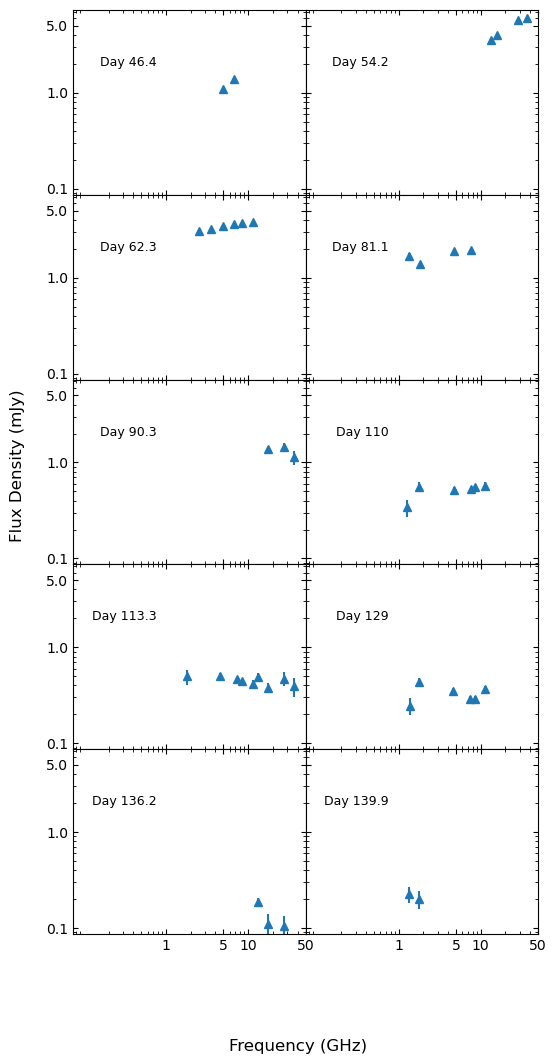

In [94]:
#making the figure (6,4) is the (rows, columns)
fig, ax = plt.subplots(5, 2, sharex='all', sharey='all')
fig.set_size_inches(6, 12)
fig.subplots_adjust(hspace=0, wspace=0)


mask = df3['Flux'] > 3 * df3['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0, 0].errorbar(df3['Freq'][mask], df3['Flux'][mask], yerr=df3['error'][mask], fmt='^')
    ax[0, 0].set_xscale('log')
    ax[0, 0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[0, 0].set_yscale('log')
    ax[0, 0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[0, 0].annotate('Day 46.4', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0, 0].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df4['Flux'] > 3 * df4['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0, 1].errorbar(df4['Freq'][mask], df4['Flux'][mask], yerr=df4['error'][mask], fmt='^')
    ax[0, 1].set_xscale('log')
    ax[0, 1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[0, 1].set_yscale('log')
    ax[0, 1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[0, 1].annotate('Day 54.2', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0, 1].tick_params(axis='both', which='both', direction='in', top=True, right=True)



mask = df5['Flux'] > 3 * df5['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1, 0].errorbar(df5['Freq'][mask], df5['Flux'][mask], yerr=df5['error'][mask], fmt='^')
    ax[1, 0].set_xscale('log')
    ax[1, 0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[1, 0].set_yscale('log')
    ax[1, 0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[1, 0].annotate('Day 62.3', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1, 0].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df7['Flux'] > 3 * df7['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1, 1].errorbar(df7['Freq'][mask], df7['Flux'][mask], yerr=df7['error'][mask], fmt='^')
    ax[1, 1].set_xscale('log')
    ax[1, 1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[1, 1].set_yscale('log')
    ax[1, 1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[1, 1].annotate('Day 81.1', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1, 1].tick_params(axis='both', which='both', direction='in', top=True, right=True)



mask = df8['Flux'] > 3 * df8['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2, 0].errorbar(df8['Freq'][mask], df8['Flux'][mask], yerr=df8['error'][mask], fmt='^')
    ax[2, 0].set_xscale('log')
    ax[2, 0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[2, 0].set_yscale('log')
    ax[2, 0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[2, 0].annotate('Day 90.3', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2, 0].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df9['Flux'] > 3 * df9['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2, 1].errorbar(df9['Freq'][mask], df9['Flux'][mask], yerr=df9['error'][mask], fmt='^')
    ax[2, 1].set_xscale('log')
    ax[2, 1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[2, 1].set_yscale('log')
    ax[2, 1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[2, 1].annotate('Day 110', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2, 1].tick_params(axis='both', which='both', direction='in', top=True, right=True)



mask = df10['Flux'] > 3 * df10['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[3, 0].errorbar(df10['Freq'][mask], df10['Flux'][mask], yerr=df10['error'][mask], fmt='^')
    ax[3, 0].set_xscale('log')
    ax[3, 0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[3, 0].set_yscale('log')
    ax[3, 0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[3, 0].annotate('Day 113.3', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3, 0].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df11['Flux'] > 3 * df11['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[3, 1].errorbar(df11['Freq'][mask], df11['Flux'][mask], yerr=df11['error'][mask], fmt='^')
    ax[3, 1].set_xscale('log')
    ax[3, 1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[3, 1].set_yscale('log')
    ax[3, 1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[3, 1].annotate('Day 129', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3, 1].tick_params(axis='both', which='both', direction='in', top=True, right=True)



mask = df12['Flux'] > 3 * df12['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[4, 0].errorbar(df12['Freq'][mask], df12['Flux'][mask], yerr=df12['error'][mask], fmt='^')
    ax[4, 0].set_xscale('log')
    ax[4, 0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[4, 0].set_yscale('log')
    ax[4, 0].set_yticks([.1, 1, 5, 10, 20, 50], labels=['0.1','1.0', '5.0', '10.0', '20.0', '50.0'])
    
    ax[4, 0].annotate('Day 136.2', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[4, 0].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df13['Flux'] > 3 * df13['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[4, 1].errorbar(df13['Freq'][mask], df13['Flux'][mask], yerr=df13['error'][mask], fmt='^')
    ax[4, 1].set_xscale('log')
    ax[4, 1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[4, 1].set_yscale('log')
    ax[4, 1].set_yticks([.1, 1, 5, 10], labels=['0.1','1.0', '5.0', '10.0'], fontsize=0.01)
    ax[4,1].margins(y=.4)
    ax[4, 1].annotate('Day 139.9', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[4, 1].tick_params(axis='both', which='both', direction='in', top=True, right=True)


plt.rcParams['ytick.labelsize']= 10
fig.supxlabel("Frequency (GHz)")
fig.supylabel("Flux Density (mJy)")
#fig.tight_layout()
plt.show();

### Now plotting the alpha lines using power laws

In [95]:
def onedlineneg(x_data, y_data, y_err):

    #LevMarLSQFitter calc uncertainties=True to get covariance matrix and find error on slope
    #Inputting the first point in the x and y data and an estimate on alpha
    PL =  PowerLaw1D(amplitude = y_data[0], x_0= x_data[0], alpha= -1.4,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x_data), max(x_data)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

    fit = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
    fit_model = fit(PL, x_data, y_data)

    #weight is 1/error^2
    y_weight = 1/ (np.power(y_err,2))  

    # fit the data using the uncertainties as weights
    fit_model_weights = fit(PL, x_data, y_data, weights=y_weight)

    return fit_model_weights



#### Day 46.4

In [96]:
#Since this day has only two data points, I have to make x_0 fixed in order to run the powerlaw1d. 
#this is done in the code below so I can use the function for the rest of the points

mask = df3['Flux'] > 3 * df3['error']  # apply detection threshold
if mask.any():
    x3 = df3['Freq'][mask].values.tolist()
    y3 = df3['Flux'][mask].values.tolist()
    yerr3 = df3['error'][mask].values.tolist()


PL3 =  PowerLaw1D(amplitude = y3[0], x_0= x3[0], alpha= -1.4,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        #'x_0': (x3[0], x3[0]),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    },
                 fixed={'x_0': True}) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model3 = fit(PL3, x3, y3)

    #weight is 1/error^2
y_weight3 = 1/ (np.power(yerr3,2))  

    # fit the data using the uncertainties as weights
fit_model_weights3 = fit(PL3, x3, y3, weights=y_weight3)

fit_model_weights3


<PowerLaw1D(amplitude=1.089, x_0=5., alpha=-0.77255236)>

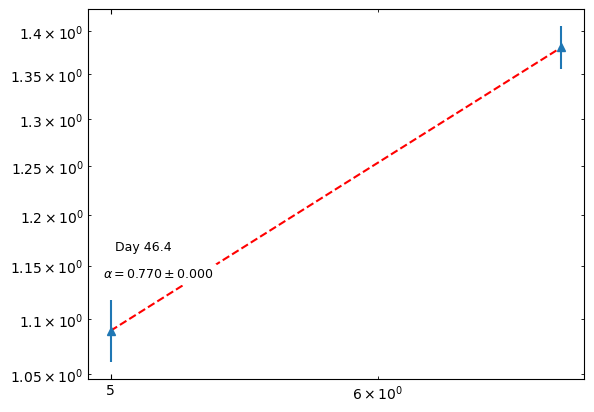

In [107]:
fig,ax = plt.subplots()
mask = df3['Flux'] > 3 * df3['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df3['Freq'][mask], df3['Flux'][mask], yerr=df3['error'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 46.4', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df3['Freq'][mask], fit_model_weights3(df3['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.770 \\pm 0.000}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

In [100]:
print(fit.fit_info)

{'nfev': 5, 'fvec': array([0., 0.]), 'fjac': array([[-2.39663059e+03,  8.46612524e-01],
       [ 5.75203957e+02,  3.61593001e+02]]), 'ipvt': array([1, 2], dtype=int32), 'qtf': array([-2.15271287e-05, -1.35326939e-05]), 'message': 'The relative error between two consecutive iterates is at most 0.000000', 'ierr': 2, 'param_jac': None, 'param_cov': None, 'njev': 4, 'cov_x': array([[6.14656000e-07, 1.83561135e-06],
       [1.83561135e-06, 7.64821289e-06]])}


#### Day 54.2

In [101]:
mask = df4['Flux'] > 3 * df4['error']  # apply detection threshold
if mask.any():
    x4 = df4['Freq'][mask].values.tolist()
    y4 = df4['Flux'][mask].values.tolist()
    yerr4 = df4['error'][mask].values.tolist()

onedlineneg(x4, y4, yerr4)

<PowerLaw1D(amplitude=3.84737053, x_0=15.28140064, alpha=-0.60591969)>

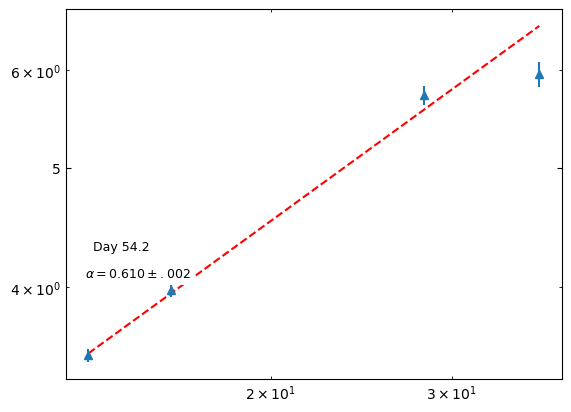

In [106]:
PL4 =  PowerLaw1D(amplitude = y4[0], x_0= x4[0], alpha= -1.4,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x4), max(x4)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit4 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model4 = fit4(PL4, x4, y4)

    #weight is 1/error^2
y_weight4 = 1/ (np.power(yerr4,2))  

    # fit the data using the uncertainties as weights
fit_model_weights4 = fit4(PL4, x4, y4, weights=y_weight4)


fig,ax = plt.subplots()
mask = df4['Flux'] > 3 * df4['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df4['Freq'][mask], df4['Flux'][mask], yerr=df4['error'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 54.2', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df4['Freq'][mask], fit_model_weights4(df4['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.610 \\pm .002}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

In [103]:
print(fit4.fit_info)

{'nfev': 15, 'fvec': array([  7.86732905,  -9.9959823 , -15.6317535 ,  28.95761926]), 'fjac': array([[-6.96753340e+02, -4.76683117e+01,  1.06290628e+02,
         1.25894736e-01],
       [-4.76683117e+01,  5.42132702e+02, -5.09190365e-13,
         5.85327661e-01],
       [ 1.06290628e+02,  4.99053342e-15, -1.33057494e-14,
         6.25143769e-01]]), 'ipvt': array([1, 3, 2], dtype=int32), 'qtf': array([-9.79660797e-13, -6.65234570e-08, -1.36305383e+01]), 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000', 'ierr': 1, 'param_jac': None, 'param_cov': array([[ 1.31447747e+26,  8.61662579e+26, -7.93192494e+09],
       [ 8.61662579e+26,  5.64834634e+27, -5.19951316e+10],
       [-7.93192494e+09, -5.19951316e+10,  3.88106134e-06]]), 'njev': 8, 'cov_x': array([[ 1.31447747e+26,  8.61662579e+26, -7.93192494e+09],
       [ 8.61662579e+26,  5.64834634e+27, -5.19951316e+10],
       [-7.93192494e+09, -5.19951316e+10,  3.88106134e-06]])}


In [104]:
param_cov4 = np.array([[ 1.31447747e+26,  8.61662579e+26, -7.93192494e+09],
       [ 8.61662579e+26,  5.64834634e+27, -5.19951316e+10],
       [-7.93192494e+09, -5.19951316e+10,  3.88106134e-06]])

#This function takes the square root of the diagonal of the matrix 

#The diagonal elements of a covariance matrix are the variances: https://stackoverflow.com/questions/52275542/how-to-calculate-the-standard-error-from-a-variance-covariance-matrix 
#The square root of them are the standard deviations

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag4 = stand(param_cov4) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print(diag4[2]) #Just showing the standard devation on the slope


0.0019700409488129936


#### Day 62.3

In [108]:
mask = df5['Flux'] > 3 * df5['error']  # apply detection threshold
if mask.any():
    x5 = df5['Freq'][mask].values.tolist()
    y5 = df5['Flux'][mask].values.tolist()
    yerr5 = df5['error'][mask].values.tolist()

onedlineneg(x5, y5, yerr5)

<PowerLaw1D(amplitude=3.62427625, x_0=6.94575726, alpha=-0.16890168)>

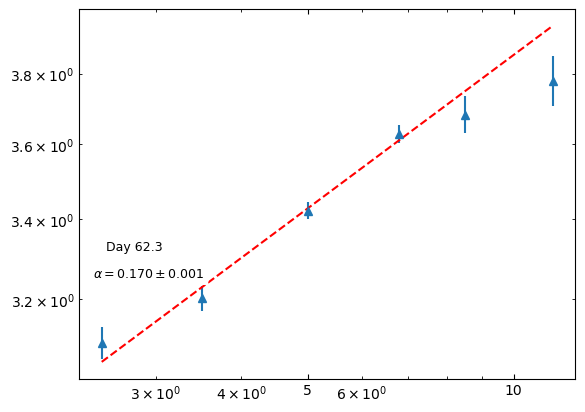

In [114]:
PL5 =  PowerLaw1D(amplitude = y5[0], x_0= x5[0], alpha= -1.4,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x5), max(x5)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit5 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model5 = fit5(PL5, x5, y5)

    #weight is 1/error^2
y_weight5 = 1/ (np.power(yerr5,2))  

    # fit the data using the uncertainties as weights
fit_model_weights5 = fit5(PL5, x5, y5, weights=y_weight5)


fig,ax = plt.subplots()
mask = df5['Flux'] > 3 * df5['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df5['Freq'][mask], df5['Flux'][mask], yerr=df5['error'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 62.3', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df5['Freq'][mask], fit_model_weights5(df5['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.170 \\pm 0.001}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

In [115]:
print(fit5.fit_info)

{'nfev': 19, 'fvec': array([-32.31293841,  30.11495686,  10.49387062, -28.29306318,
        24.78637314,  32.06449405]), 'fjac': array([[-4.00084309e+03, -1.91117739e+03,  1.68436674e+02,
         3.06296377e-02, -6.99983150e-02, -9.68113808e-02],
       [-1.91117739e+03, -1.90715085e+03,  1.68081806e+02,
         8.10092779e-01,  2.59728688e-01,  1.94815673e-01],
       [ 1.68436674e+02,  1.68081806e+02,  3.48093429e-14,
        -0.00000000e+00, -4.08248290e-01, -4.08248290e-01]]), 'ipvt': array([3, 1, 2], dtype=int32), 'qtf': array([-2.80022835e-04, -2.79432944e-04,  1.33942862e+01]), 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000', 'ierr': 1, 'param_jac': None, 'param_cov': array([[ 6.41031940e+24,  7.27350949e+25, -1.84861062e+09],
       [ 7.27350949e+25,  8.25293360e+26, -2.09753774e+10],
       [-1.84861062e+09, -2.09753774e+10,  6.58314513e-07]]), 'njev': 10, 'cov_x': array([[ 6.41031940e+24,  7.27350949e+25, -1.84861062e

In [117]:
param_cov5 = np.array([[ 6.41031940e+24,  7.27350949e+25, -1.84861062e+09],
       [ 7.27350949e+25,  8.25293360e+26, -2.09753774e+10],
       [-1.84861062e+09, -2.09753774e+10,  6.58314513e-07]])

#This function takes the square root of the diagonal of the matrix 

#The diagonal elements of a covariance matrix are the variances: https://stackoverflow.com/questions/52275542/how-to-calculate-the-standard-error-from-a-variance-covariance-matrix 
#The square root of them are the standard deviations

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag5 = stand(param_cov5) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print("The standard deviation is", diag5[2]) #Just showing the standard devation on the slope


The standard deviation is 0.0008113658317922933


#### Day 81.1

In [126]:
mask = df7['Flux'] > 3 * df7['error']  # apply detection threshold
if mask.any():
    x7 = df7['Freq'][mask].values.tolist()
    y7 = df7['Flux'][mask].values.tolist()
    yerr7 = df7['error'][mask].values.tolist()

#need two for ths one?

In [127]:
#Initialize fitters
fitBPL = fitting.LevMarLSQFitter(calc_uncertainties=True)
#print(fitBPL.fit_info)

#A function that will produce a broken power law for given input values
#Also fits the BPL using LevMarLSQFitter 
#Issue: not all BPL's work so I get an error when trying to fit it to the data 

def bpl_func(freq, flux, er, a1, a2):
    wt = 1 / (np.power(er,2))
    peak = np.max(flux)
    BPL = []
    
    for i in range(0,len(freq)):
        for j in range(0,len(a1)):
            bro = BrokenPowerLaw1D(peak, freq[i], alpha_1 = a1[j], alpha_2 = a2[j])
            BPL.append(bro)
        
        
    return(BPL)

#Input values for function above 
#Going through a range of x values (the point where the line breaks)
#And different alpha 1 and alpha 2 values (the alpha values on either side of that break)

x_val = np.arange(0.1,40,0.5)   #Going through a range of freq values from 0.1 to 40
                                #because thats what my data ranges from, may be different for you
    
a1 = np.arange(-1,0,0.2)
a2 = np.arange(0,1,0.2)

BM7 = bpl_func(x_val, y7, yerr7, a1, a2)
print(BM7[30])


weight7 = 1/ (np.power(yerr7,2))
fw_BPL7 = fitBPL(BM7[30], x7, y7, weights=weight7)    

print(fw_BPL7)

Model: BrokenPowerLaw1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
    amplitude x_break alpha_1 alpha_2
    --------- ------- ------- -------
        1.921     3.1    -1.0     0.0
Model: BrokenPowerLaw1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude           x_break           alpha_1             alpha_2       
    ------------------ ----------------- ------------------ --------------------
    1.9066686052153232 4.740001011469044 -0.302358566971688 -0.01593543084974827


In [128]:
print(fitBPL.fit_info)

{'nfev': 35, 'fvec': array([-26.09489646,   9.46888172,  -0.45475693,   0.05068988]), 'fjac': array([[-2.35396494e+03, -1.20232503e+02,  2.18066917e+00,
        -9.45259706e+00],
       [ 1.38328430e+03, -1.00471408e+03,  6.01452582e-03,
         4.52737085e-01],
       [-2.50887683e+01, -3.45420651e+01,  3.28512612e+02,
        -1.88266580e+00],
       [ 1.08752864e+02,  1.28955838e+02,  2.43533791e-14,
         2.04121259e-14]]), 'ipvt': array([1, 4, 3, 2], dtype=int32), 'qtf': array([  0.05691041,   0.16460959,  -0.04613227, -27.76292947]), 'message': 'The relative error between two consecutive iterates is at most 0.000000', 'ierr': 2, 'param_jac': None, 'param_cov': None, 'njev': 19, 'cov_x': array([[ 3.55027213e+25,  2.91905705e+26, -2.16396268e+10,
         3.74663255e+25],
       [ 2.91905705e+26,  2.40006787e+27, -1.77922432e+11,
         3.08050588e+26],
       [-2.16396268e+10, -1.77922432e+11,  2.24558673e-05,
        -2.28364833e+10],
       [ 3.74663255e+25,  3.08050588e+2

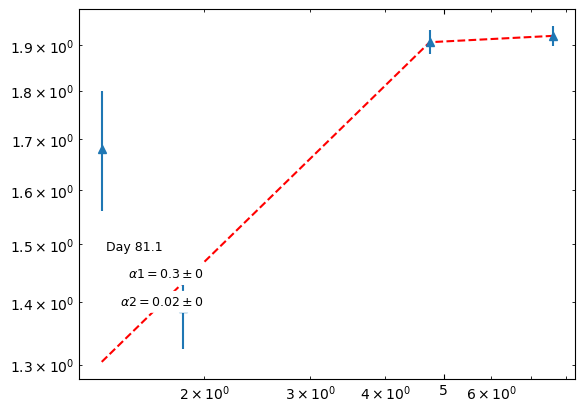

In [18]:
fig,ax = plt.subplots()
mask = df7['Flux'] > 3 * df7['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df7['Freq'][mask], df7['Flux'][mask], yerr=df7['error'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 81.1', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df7['Freq'][mask], fw_BPL7(df7['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 1 = 0.3 \\pm 0}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.annotate('${\u03B1 2 = 0.02 \\pm 0}$', xy=(90, 60), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
plt.show();

### Day 90.3

In [19]:
mask = df8['Flux'] > 3 * df8['error']  # apply detection threshold
if mask.any():
    x8 = df8['Freq'][mask].values.tolist()
    y8 = df8['Flux'][mask].values.tolist()
    yerr8 = df8['error'][mask].values.tolist()

onedlineneg(x8, y8, yerr8)

<PowerLaw1D(amplitude=1.3613417, x_0=22.5759026, alpha=0.05228455)>

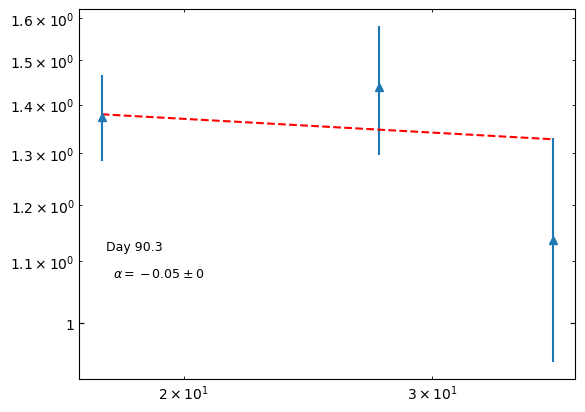

In [20]:
PL8 =  PowerLaw1D(amplitude = y8[0], x_0= x8[0], alpha= -1.4,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x8), max(x8)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit8 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model8 = fit8(PL8, x8, y8)

    #weight is 1/error^2
y_weight8 = 1/ (np.power(yerr8,2))  

    # fit the data using the uncertainties as weights
fit_model_weights8 = fit8(PL8, x8, y8, weights=y_weight8)


fig,ax = plt.subplots()
mask = df8['Flux'] > 3 * df8['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df8['Freq'][mask], df8['Flux'][mask], yerr=df8['error'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 90.3', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df8['Freq'][mask], fit_model_weights8(df8['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.05 \\pm 0}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

#### Day 110

In [137]:
mask = df9['Flux'] > 3 * df9['error']  # apply detection threshold
if mask.any():
    x9 = df9['Freq'][mask].values.tolist()
    y9 = df9['Flux'][mask].values.tolist()
    yerr9 = df9['error'][mask].values.tolist()

#need two for this one?
print(x9)

print(y9)

print(yerr9)

[1.2555, 1.7715, 4.74, 7.59, 8.53, 11.38]
[0.34, 0.56, 0.521, 0.528, 0.556, 0.571]
[0.071, 0.072, 0.033, 0.025, 0.031, 0.06]


In [138]:
#Initialize fitters
fitBPL = fitting.LevMarLSQFitter(calc_uncertainties=True)
#print(fitBPL.fit_info)

#A function that will produce a broken power law for given input values
#Also fits the BPL using LevMarLSQFitter 
#Issue: not all BPL's work so I get an error when trying to fit it to the data 

def bpl_func(freq, flux, er, a1, a2):
    wt = 1 / (np.power(er,2))
    peak = np.max(flux)
    BPL = []
    
    for i in range(0,len(freq)):
        for j in range(0,len(a1)):
            bro = BrokenPowerLaw1D(peak, freq[i], alpha_1 = a1[j], alpha_2 = a2[j])
            BPL.append(bro)
        
        
    return(BPL)

#Input values for function above 
#Going through a range of x values (the point where the line breaks)
#And different alpha 1 and alpha 2 values (the alpha values on either side of that break)

x_val = np.arange(0.1,40,0.5)   #Going through a range of freq values from 0.1 to 40
                                #because thats what my data ranges from, may be different for you
    
a1 = np.arange(-1,0,0.2)
a2 = np.arange(0,1,0.2)

BM9 = bpl_func(x_val, y9, yerr9, a1, a2)
print(BM9[30])

x9 = np.array(x9)
print(BM9[30](x9))


weight9 = 1/ (np.power(yerr9,2))


BM9[30].amplitude.min = 0
BM9[30].x_break.min = 0.01  # no zero or negative break freq
BM9[30].alpha_1.min = -5
BM9[30].alpha_1.max = 5
BM9[30].alpha_2.min = -5
BM9[30].alpha_2.max = 5

fw_BPL9 = fitBPL(BM9[30], x9, y9, weights=weight9)    


print(fw_BPL9)

Model: BrokenPowerLaw1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
    amplitude x_break alpha_1 alpha_2
    --------- ------- ------- -------
        0.571     3.1    -1.0     0.0
[0.231255   0.32629887 0.571      0.571      0.571      0.571     ]
Model: BrokenPowerLaw1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude           x_break             alpha_1              alpha_2       
    ------------------ ------------------ ------------------- ---------------------
    0.4932109360401272 1.7025050026589448 -1.2213685067835205 -0.055838445154150027


In [139]:
print(fitBPL.fit_info)

{'nfev': 18, 'fvec': array([ 2.04498133e-04, -1.26724135e+01,  1.13132740e+00,  1.30283515e+01,
       -1.70139854e+01, -6.27603217e+00]), 'fjac': array([[-2.32771142e+03,  1.64453484e+03,  4.03663126e+01,
        -1.20683472e+00,  4.89132595e-01,  1.32689967e-01],
       [ 1.64453484e+03, -2.88753098e+02,  1.54495825e+01,
        -6.87328294e+00, -5.02751888e-01, -2.88463751e-01],
       [ 4.03663126e+01,  1.54495825e+01, -4.34281128e+01,
         1.93205031e+01,  4.26274716e-01,  8.72683916e-02],
       [-1.20683472e+00, -6.87328294e+00,  1.93205031e+01,
        -3.55271368e-15,  0.00000000e+00,  0.00000000e+00]]), 'ipvt': array([1, 4, 2, 3], dtype=int32), 'qtf': array([-2.29041680e-05, -1.72749714e-04,  1.54542250e-04, -6.54539444e+00]), 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000', 'ierr': 1, 'param_jac': None, 'param_cov': array([[4.10326691e+24, 2.53660095e+26, 5.70170411e+26, 4.03667597e+09],
       [2.53660095e+26, 1.5

In [136]:
param_cov9 = np.array([[4.10326691e+24, 2.53660095e+26, 5.70170411e+26, 4.03667597e+09],
       [2.53660095e+26, 1.56810281e+28, 3.52473977e+28, 2.49543506e+11],
       [5.70170411e+26, 3.52473977e+28, 7.92281625e+28, 5.60917252e+11],
       [4.03667597e+09, 2.49543506e+11, 5.60917252e+11, 1.74825696e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2]) #error 1
    sd4 = np.sqrt(diag[3]) #error 2
    return(sd1,sd2,sd3, sd4)

diag9 = stand(param_cov9) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print("The standard deviation 1 is", diag9, 'the second is', diag9[3]) #Just showing the standard devation on the slope


The standard deviation 1 is (2025652218422.501, 125223911853926.69, 281474976685317.44, 0.004181216282375261) the second is 0.004181216282375261


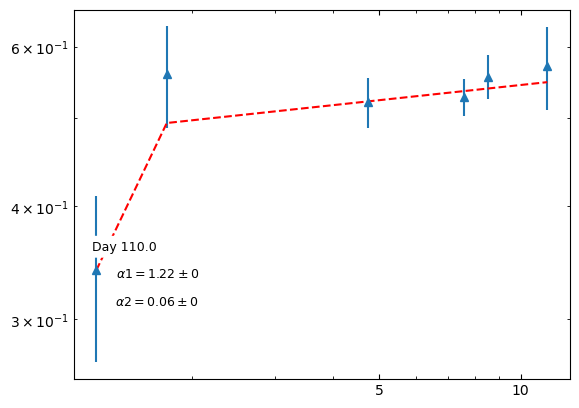

In [23]:
fig,ax = plt.subplots()
mask = df9['Flux'] > 3 * df9['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df9['Freq'][mask], df9['Flux'][mask], yerr=df9['error'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 110.0', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df9['Freq'][mask], fw_BPL9(df9['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 1 = 1.22 \\pm 0}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.annotate('${\u03B1 2 = 0.06 \\pm 0}$', xy=(90, 60), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
plt.show();

#### Day 113.3

In [24]:
mask = df10['Flux'] > 3 * df10['error']  # apply detection threshold
if mask.any():
    x10 = df10['Freq'][mask].values.tolist()
    y10 = df10['Flux'][mask].values.tolist()
    yerr10 = df10['error'][mask].values.tolist()

#need two for this one?

In [28]:
onedlineneg(x10, y10, yerr10)

C:\Users\wilhe\anaconda3\Lib\site-packages\astropy\modeling\powerlaws.py:64: RuntimeWarning: invalid value encountered in power
  d_amplitude = xx ** (-alpha)
C:\Users\wilhe\anaconda3\Lib\site-packages\astropy\modeling\powerlaws.py:66: RuntimeWarning: invalid value encountered in log
  d_alpha = -amplitude * d_amplitude * np.log(xx)


<PowerLaw1D(amplitude=0.3967843, x_0=21.30561331, alpha=0.13931653)>

C:\Users\wilhe\anaconda3\Lib\site-packages\astropy\modeling\powerlaws.py:64: RuntimeWarning: invalid value encountered in power
  d_amplitude = xx ** (-alpha)
C:\Users\wilhe\anaconda3\Lib\site-packages\astropy\modeling\powerlaws.py:66: RuntimeWarning: invalid value encountered in log
  d_alpha = -amplitude * d_amplitude * np.log(xx)


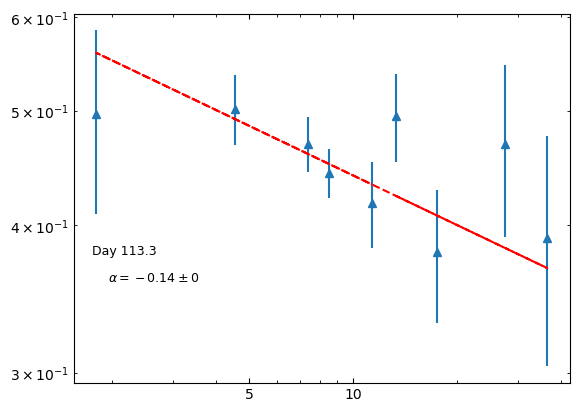

In [29]:
PL10 =  PowerLaw1D(amplitude = y10[0], x_0= x10[0], alpha= -1.4,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x10), max(x10)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit10 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model10 = fit10(PL10, x10, y10)

    #weight is 1/error^2
y_weight10 = 1/ (np.power(yerr10,2))  

    # fit the data using the uncertainties as weights
fit_model_weights10 = fit10(PL10, x10, y10, weights=y_weight10)


fig,ax = plt.subplots()
mask = df10['Flux'] > 3 * df10['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df10['Freq'][mask], df10['Flux'][mask], yerr=df10['error'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 113.3', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df10['Freq'][mask], fit_model_weights10(df10['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.14 \\pm 0}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

In [30]:
print(x10)
print(y10)
print(yerr10)

[13.3, 17.45, 27.5, 36.5, 1.8, 4.549, 7.399, 8.51, 11.34]
[0.495, 0.38, 0.469, 0.39, 0.497, 0.502, 0.469, 0.443, 0.418]
[0.042, 0.049, 0.078, 0.086, 0.088, 0.034, 0.025, 0.021, 0.035]


In [56]:
#Initialize fitters
fitBPL = fitting.LevMarLSQFitter(calc_uncertainties=True)
#print(fitBPL.fit_info)

#A function that will produce a broken power law for given input values
#Also fits the BPL using LevMarLSQFitter 
#Issue: not all BPL's work so I get an error when trying to fit it to the data 

def bpl_func(freq, flux, er, a1, a2):
    wt = 1 / (np.power(er,2))
    peak = np.max(flux)
    BPL = []
    
    for i in range(0,len(freq)):
        for j in range(0,len(a1)):
            bro = BrokenPowerLaw1D(peak, freq[i], alpha_1 = a1[j], alpha_2 = a2[j])
            BPL.append(bro)
        
        
    return(BPL)

#Input values for function above 
#Going through a range of x values (the point where the line breaks)
#And different alpha 1 and alpha 2 values (the alpha values on either side of that break)

x_val = np.arange(0.1,50,0.1)   #Going through a range of freq values from 0.1 to 40
                                #because thats what my data ranges from, may be different for you
    
a1 = np.arange(-1,0,0.2)
a2 = np.arange(0,1,0.2)

BM10 = bpl_func(x_val, y10, yerr10, a1, a2)
print(BM10[30])


weight10 = 1/ (np.power(yerr10,2))


BM10[30].amplitude.min = 0
BM10[30].x_break.min = 0.1  # no zero or negative break freq
BM10[30].alpha_1.min = -5
BM10[30].alpha_1.max = 5
BM10[30].alpha_2.min = -5
BM10[30].alpha_2.max = 5

fw_BPL10 = fitBPL(BM10[30], x10, y10, weights=weight10)    

print(fw_BPL10)

Model: BrokenPowerLaw1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
    amplitude      x_break       alpha_1 alpha_2
    --------- ------------------ ------- -------
        0.502 0.7000000000000001    -1.0     0.0
Model: BrokenPowerLaw1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude           x_break       alpha_1       alpha_2      
    ------------------ ------------------ ------- -------------------
    0.6069176474677684 1.0083994184493958    -1.0 0.13931652555575416


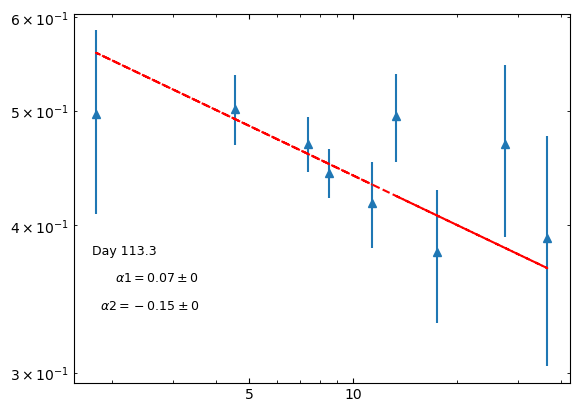

In [57]:
fig,ax = plt.subplots()
mask = df10['Flux'] > 3 * df10['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df10['Freq'][mask], df10['Flux'][mask], yerr=df10['error'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 113.3', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df10['Freq'][mask], fw_BPL10(df10['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 1 = 0.07 \\pm 0}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.annotate('${\u03B1 2 = -0.15 \\pm 0}$', xy=(90, 60), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
plt.show();

### Day 129

In [59]:
mask = df11['Flux'] > 3 * df11['error']  # apply detection threshold
if mask.any():
    x11 = df11['Freq'][mask].values.tolist()
    y11 = df11['Flux'][mask].values.tolist()
    yerr11 = df11['error'][mask].values.tolist()

#need two for this one?
print(x11)

print(y11)

print(yerr11)

[1.36, 1.78, 4.608, 7.458, 8.5, 11.4]
[0.244, 0.431, 0.347, 0.292, 0.289, 0.368]
[0.049, 0.048, 0.028, 0.016, 0.018, 0.031]


Model: PowerLaw1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude      x_0         alpha       
    ------------------ ---- -------------------
    0.2884159941448254 11.4 0.07719678437719316


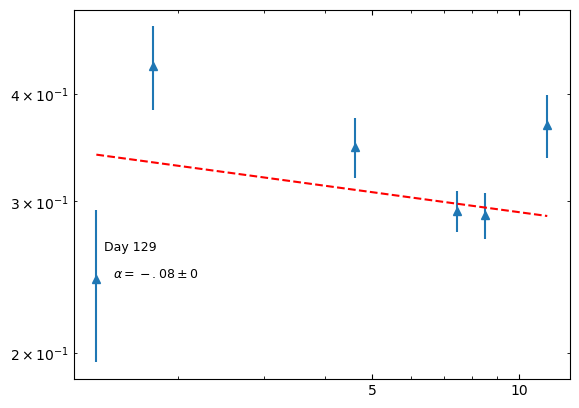

In [66]:
print(onedlineneg(x11, y11, yerr11))

PL11 =  PowerLaw1D(amplitude = y11[0], x_0= x11[0], alpha= -1.4,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x11), max(x11)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit11 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model11 = fit11(PL11, x11, y11)

    #weight is 1/error^2
y_weight11 = 1/ (np.power(yerr11,2))  

    # fit the data using the uncertainties as weights
fit_model_weights11 = fit11(PL11, x11, y11, weights=y_weight11)


fig,ax = plt.subplots()
mask = df11['Flux'] > 3 * df11['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df11['Freq'][mask], df11['Flux'][mask], yerr=df11['error'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 129', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df11['Freq'][mask], fit_model_weights11(df11['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = -.08 \\pm 0}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

In [62]:
#Initialize fitters
fitBPL = fitting.LevMarLSQFitter(calc_uncertainties=True)
#print(fitBPL.fit_info)

#A function that will produce a broken power law for given input values
#Also fits the BPL using LevMarLSQFitter 
#Issue: not all BPL's work so I get an error when trying to fit it to the data 

def bpl_func(freq, flux, er, a1, a2):
    wt = 1 / (np.power(er,2))
    peak = np.max(flux)
    BPL = []
    
    for i in range(0,len(freq)):
        for j in range(0,len(a1)):
            bro = BrokenPowerLaw1D(peak, freq[i], alpha_1 = a1[j], alpha_2 = a2[j])
            BPL.append(bro)
        
        
    return(BPL)

#Input values for function above 
#Going through a range of x values (the point where the line breaks)
#And different alpha 1 and alpha 2 values (the alpha values on either side of that break)

x_val = np.arange(0.1,40,0.5)   #Going through a range of freq values from 0.1 to 40
                                #because thats what my data ranges from, may be different for you
    
a1 = np.arange(-1,0,0.2)
a2 = np.arange(0,1,0.2)

BM11 = bpl_func(x_val, y11, yerr11, a1, a2)
print(BM11[30])

weight11 = 1/ (np.power(yerr11,2))


x11 = np.array(x11)
print(BM9[30](x11))

BM11[30].amplitude.min = 0
BM11[30].x_break.min = 0.01  # no zero or negative break freq
BM11[30].alpha_1.min = -5
BM11[30].alpha_1.max = 5
BM11[30].alpha_2.min = -5
BM11[30].alpha_2.max = 5

fw_BPL11 = fitBPL(BM11[30], x11, y11, weights=weight11)    


print(fw_BPL11)

Model: BrokenPowerLaw1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
    amplitude x_break alpha_1 alpha_2
    --------- ------- ------- -------
        0.431     3.1    -1.0     0.0
[0.25050323 0.32786452 0.571      0.571      0.571      0.571     ]
Model: BrokenPowerLaw1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
    amplitude x_break alpha_1 alpha_2
    --------- ------- ------- -------
          0.0    0.01    -5.0    -5.0


C:\Users\wilhe\anaconda3\Lib\site-packages\astropy\modeling\powerlaws.py:135: RuntimeWarning: invalid value encountered in power
  d_amplitude = xx ** (-alpha)
C:\Users\wilhe\anaconda3\Lib\site-packages\astropy\modeling\powerlaws.py:137: RuntimeWarning: invalid value encountered in log
  d_alpha = -amplitude * d_amplitude * np.log(xx)


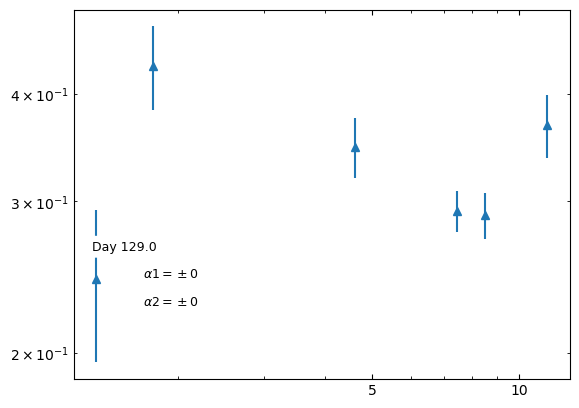

In [64]:
fig,ax = plt.subplots()
mask = df11['Flux'] > 3 * df11['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df11['Freq'][mask], df11['Flux'][mask], yerr=df11['error'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 129.0', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df11['Freq'][mask], fw_BPL11(df11['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 1 =  \\pm 0}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.annotate('${\u03B1 2 =  \\pm 0}$', xy=(90, 60), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
plt.show();

### Day 136.2

In [68]:
mask = df12['Flux'] > 3 * df12['error']  # apply detection threshold
if mask.any():
    x12 = df12['Freq'][mask].values.tolist()
    y12 = df12['Flux'][mask].values.tolist()
    yerr12 = df12['error'][mask].values.tolist()

print(x12)

print(y12)

print(yerr12)

print(onedlineneg(x12, y12, yerr12))

[13.3, 17.45, 27.5]
[0.188, 0.11, 0.106]
[0.019, 0.029, 0.027]
Model: PowerLaw1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude      x_0        alpha       
    ------------------ ---- ------------------
    0.0918614932771701 27.5 0.9646093961269085


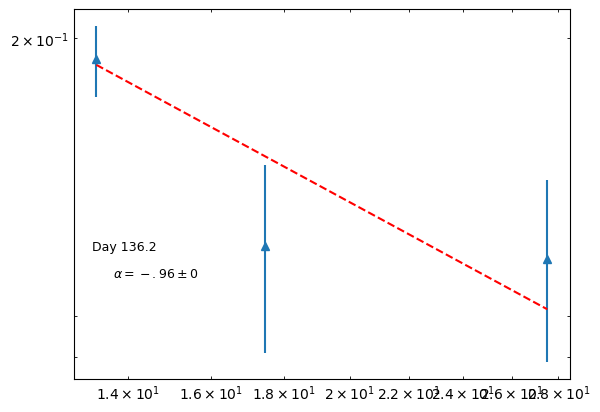

In [69]:
PL12 =  PowerLaw1D(amplitude = y12[0], x_0= x12[0], alpha= -1.4,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x12), max(x12)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit12 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model12 = fit12(PL12, x12, y12)

    #weight is 1/error^2
y_weight12 = 1/ (np.power(yerr12,2))  

    # fit the data using the uncertainties as weights
fit_model_weights12 = fit12(PL12, x12, y12, weights=y_weight12)


fig,ax = plt.subplots()
mask = df12['Flux'] > 3 * df12['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df12['Freq'][mask], df12['Flux'][mask], yerr=df12['error'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 136.2', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df12['Freq'][mask], fit_model_weights12(df12['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = -.96 \\pm 0}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

### Day 139.9

In [70]:
#Since this day has only two data points, I have to make x_0 fixed in order to run the powerlaw1d. 
#this is done in the code below so I can use the function for the rest of the points

mask = df13['Flux'] > 3 * df13['error']  # apply detection threshold
if mask.any():
    x13 = df13['Freq'][mask].values.tolist()
    y13 = df13['Flux'][mask].values.tolist()
    yerr13 = df13['error'][mask].values.tolist()


PL13 =  PowerLaw1D(amplitude = y13[0], x_0= x13[0], alpha= -1.4,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        #'x_0': (x3[0], x3[0]),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    },
                 fixed={'x_0': True}) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model13 = fit(PL13, x13, y13)

    #weight is 1/error^2
y_weight13 = 1/ (np.power(yerr13,2))  

    # fit the data using the uncertainties as weights
fit_model_weights13 = fit(PL13, x13, y13, weights=y_weight13)

fit_model_weights13


<PowerLaw1D(amplitude=0.225, x_0=1.33, alpha=0.394665)>

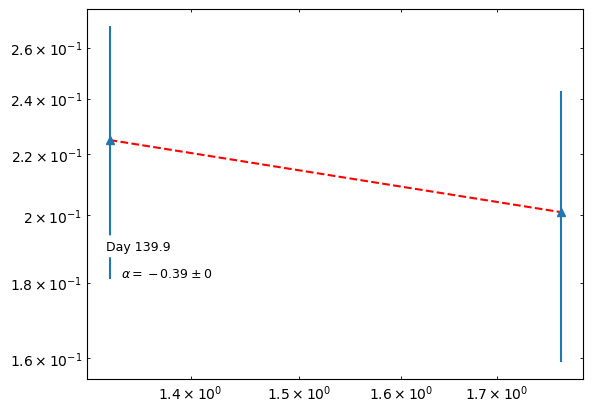

In [71]:
fig,ax = plt.subplots()
mask = df13['Flux'] > 3 * df13['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df13['Freq'][mask], df13['Flux'][mask], yerr=df13['error'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 139.9', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df13['Freq'][mask], fit_model_weights13(df13['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.39 \\pm 0}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

## Now to put all of them together into one big plot

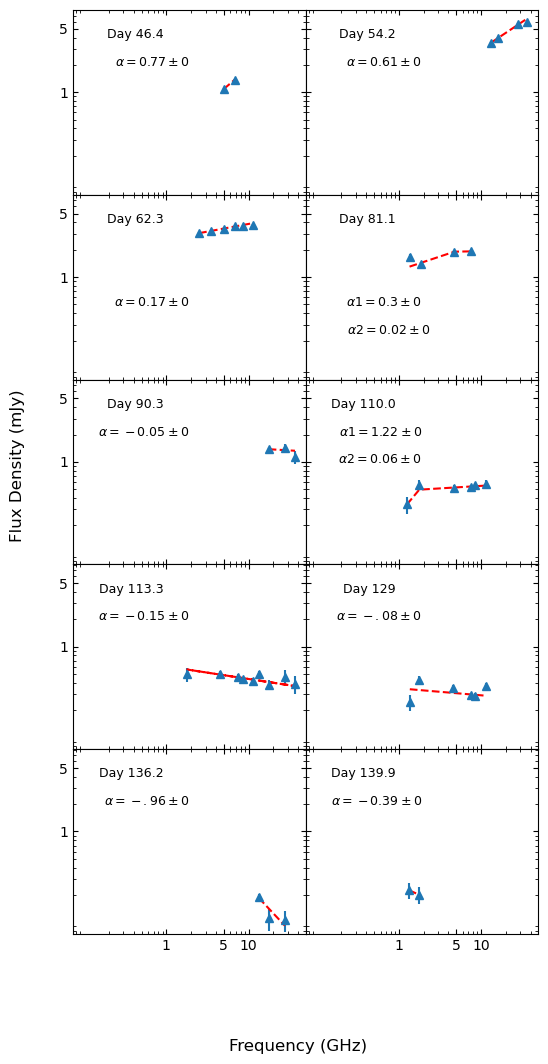

In [86]:
#making the figure (5,2) is the (rows, columns)
fig, ax = plt.subplots(5, 2, sharex='all', sharey='all')
fig.set_size_inches(6, 12)
fig.subplots_adjust(hspace=0, wspace=0)

mask = df3['Flux'] > 3 * df3['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0,0].errorbar(df3['Freq'][mask], df3['Flux'][mask], yerr=df3['error'][mask], fmt='^')
    ax[0,0].set_xscale('log')
    ax[0,0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[0,0].set_yscale('log')
    ax[0,0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[0,0].annotate('Day 46.4', xy=(65, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0,0].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[0,0].plot(df3['Freq'][mask], fit_model_weights3(df3['Freq'][mask]), 'r--')
    ax[0,0].annotate('${\u03B1 = 0.77 \\pm 0}$', xy=(84, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df4['Flux'] > 3 * df4['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0,1].errorbar(df4['Freq'][mask], df4['Flux'][mask], yerr=df4['error'][mask], fmt='^')
    ax[0,1].set_xscale('log')
    ax[0,1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[0,1].set_yscale('log')
    ax[0,1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[0,1].annotate('Day 54.2', xy=(65, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0,1].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[0,1].plot(df4['Freq'][mask], fit_model_weights4(df4['Freq'][mask]), 'r--')
    ax[0,1].annotate('${\u03B1 = 0.61 \\pm 0}$', xy=(84, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df5['Flux'] > 3 * df5['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1,0].errorbar(df5['Freq'][mask], df5['Flux'][mask], yerr=df5['error'][mask], fmt='^')
    ax[1,0].set_xscale('log')
    ax[1,0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[1,0].set_yscale('log')
    ax[1,0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[1,0].annotate('Day 62.3', xy=(65, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,0].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[1,0].plot(df5['Freq'][mask], fit_model_weights5(df5['Freq'][mask]), 'r--')
    ax[1,0].annotate('${\u03B1 = 0.17 \\pm 0}$', xy=(84, 60), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df7['Flux'] > 3 * df7['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1,1].errorbar(df7['Freq'][mask], df7['Flux'][mask], yerr=df7['error'][mask], fmt='^')
    ax[1,1].set_xscale('log')
    ax[1,1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[1,1].set_yscale('log')
    ax[1,1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[1,1].annotate('Day 81.1', xy=(65, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,1].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[1,1].plot(df7['Freq'][mask], fw_BPL7(df7['Freq'][mask]), 'r--')
    ax[1,1].annotate('${\u03B1 1 = 0.3 \\pm 0}$', xy=(84, 60), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,1].annotate('${\u03B1 2 = 0.02 \\pm 0}$', xy=(90, 40), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df8['Flux'] > 3 * df8['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2,0].errorbar(df8['Freq'][mask], df8['Flux'][mask], yerr=df8['error'][mask], fmt='^')
    ax[2,0].set_xscale('log')
    ax[2,0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[2,0].set_yscale('log')
    ax[2,0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[2,0].annotate('Day 90.3', xy=(65, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,0].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[2,0].plot(df8['Freq'][mask], fit_model_weights8(df8['Freq'][mask]), 'r--')
    ax[2,0].annotate('${\u03B1 = -0.05 \\pm 0}$', xy=(84, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df9['Flux'] > 3 * df9['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2,1].errorbar(df9['Freq'][mask], df9['Flux'][mask], yerr=df9['error'][mask], fmt='^')
    ax[2,1].set_xscale('log')
    ax[2,1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[2,1].set_yscale('log')
    ax[2,1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[2,1].annotate('Day 110.0', xy=(65, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,1].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[2,1].plot(df9['Freq'][mask], fw_BPL9(df9['Freq'][mask]), 'r--')
    ax[2,1].annotate('${\u03B1 1 = 1.22 \\pm 0}$', xy=(84, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,1].annotate('${\u03B1 2 = 0.06 \\pm 0}$', xy=(84, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df10['Flux'] > 3 * df10['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[3,0].errorbar(df10['Freq'][mask], df10['Flux'][mask], yerr=df10['error'][mask], fmt='^')
    ax[3,0].set_xscale('log')
    ax[3,0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[3,0].set_yscale('log')
    ax[3,0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[3,0].annotate('Day 113.3', xy=(65, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3,0].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[3,0].plot(df10['Freq'][mask], fw_BPL10(df10['Freq'][mask]), 'r--')
    #ax[3,0].annotate('${\u03B1 1 = 0.07 \\pm 0}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3,0].annotate('${\u03B1 = -0.15 \\pm 0}$', xy=(84, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df11['Flux'] > 3 * df11['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[3,1].errorbar(df11['Freq'][mask], df11['Flux'][mask], yerr=df11['error'][mask], fmt='^')
    ax[3,1].set_xscale('log')
    ax[3,1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[3,1].set_yscale('log')
    ax[3,1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[3,1].annotate('Day 129', xy=(65, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3,1].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[3,1].plot(df11['Freq'][mask], fit_model_weights11(df11['Freq'][mask]), 'r--')
    ax[3,1].annotate('${\u03B1 = -.08 \\pm 0}$', xy=(84, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df12['Flux'] > 3 * df12['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[4,0].errorbar(df12['Freq'][mask], df12['Flux'][mask], yerr=df12['error'][mask], fmt='^')
    ax[4,0].set_xscale('log')
    ax[4,0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[4,0].set_yscale('log')
    ax[4,0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[4,0].annotate('Day 136.2', xy=(65, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[4,0].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[4,0].plot(df12['Freq'][mask], fit_model_weights12(df12['Freq'][mask]), 'r--')
    ax[4,0].annotate('${\u03B1 = -.96 \\pm 0}$', xy=(84, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df13['Flux'] > 3 * df13['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[4,1].errorbar(df13['Freq'][mask], df13['Flux'][mask], yerr=df13['error'][mask], fmt='^')
    ax[4,1].set_xscale('log')
    ax[4,1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[4,1].set_yscale('log')
    ax[4,1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[4,1].annotate('Day 139.9', xy=(65, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[4,1].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[4,1].plot(df13['Freq'][mask], fit_model_weights13(df13['Freq'][mask]), 'r--')
    ax[4,1].annotate('${\u03B1 = -0.39 \\pm 0}$', xy=(84, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


plt.rcParams['ytick.labelsize']= 10
fig.supxlabel("Frequency (GHz)")
fig.supylabel("Flux Density (mJy)")
#fig.tight_layout()
plt.show();